In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q3

In [2]:
df = pd.read_csv('Lab6.1.csv')
y = df['salary'].values
x = df['experience'].values.reshape(-1, 1)

In [3]:
def calc(b1,b0,x,y):
    y_pred = b0+b1*x
    mse = np.mean((y-y_pred)**2)
    return mse

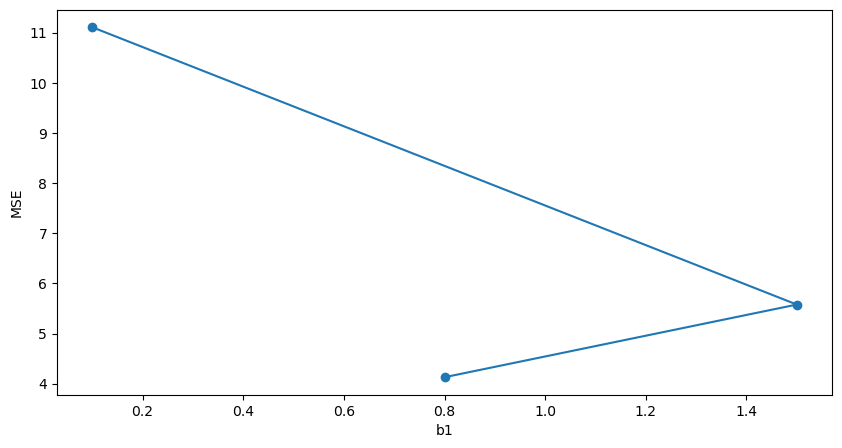

In [4]:
b1 = [0.1,1.5,0.8]
b0 = 1.1
val= [calc(b,b0,x,y) for b in b1]

plt.figure(figsize=(10, 5))
plt.plot(b1,val, marker='o')
plt.xlabel('b1')
plt.ylabel('MSE')
plt.show()

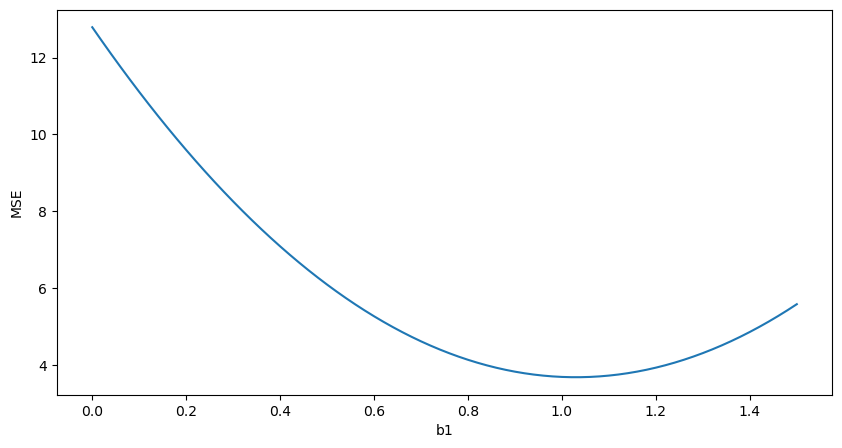

In [5]:
b2 = np.arange(0,1.51,0.01)
val= [calc(b,b0,x,y) for b in b2]

plt.figure(figsize=(10, 5))
plt.plot(b2,val)
plt.xlabel('b1')
plt.ylabel('MSE')
plt.show()

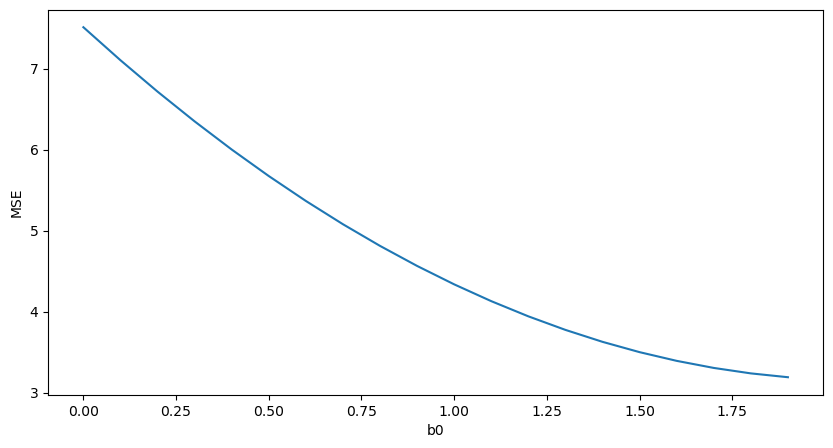

In [6]:
b3 = np.arange(0,2,0.1)
b1 = 0.8
val= [calc(b1,b,x,y) for b in b3]

plt.figure(figsize=(10, 5))
plt.plot(b3,val)
plt.xlabel('b0')
plt.ylabel('MSE')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x, y)
y_p = model.predict(x)
mse_sklearn = mean_squared_error(y, y_p)

print(f"MSE: {mse_sklearn}")

MSE: 0.23366710810280558


# Q4

/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum

/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum

/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum

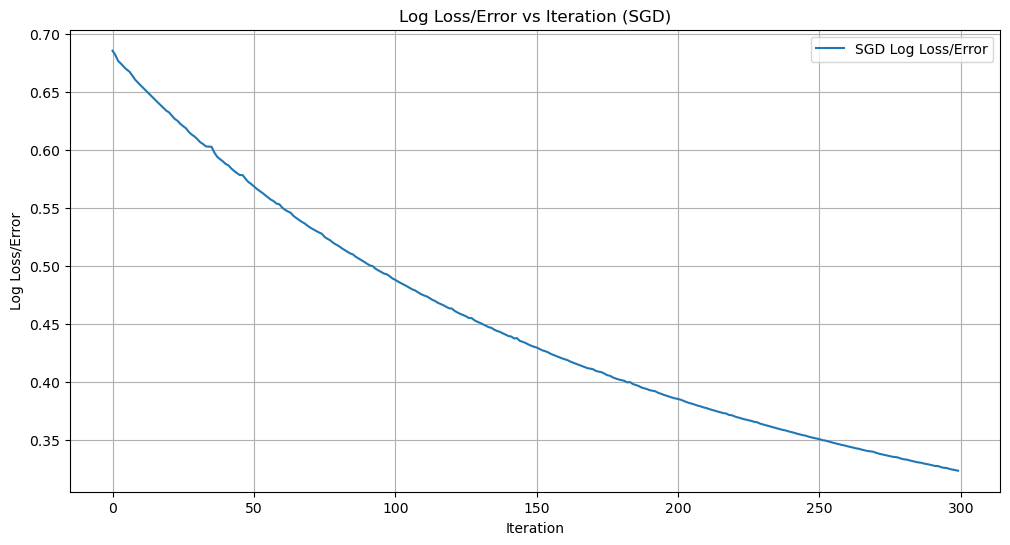

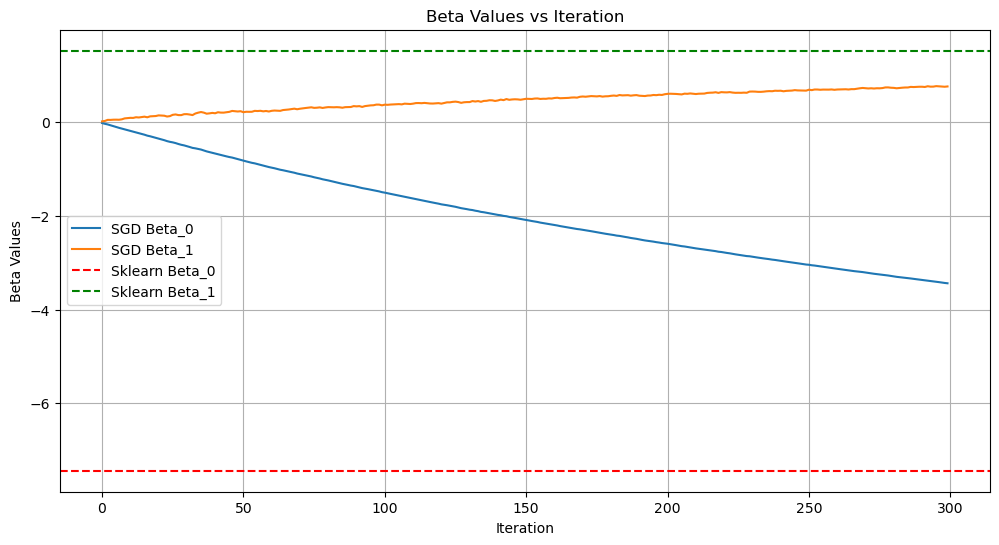

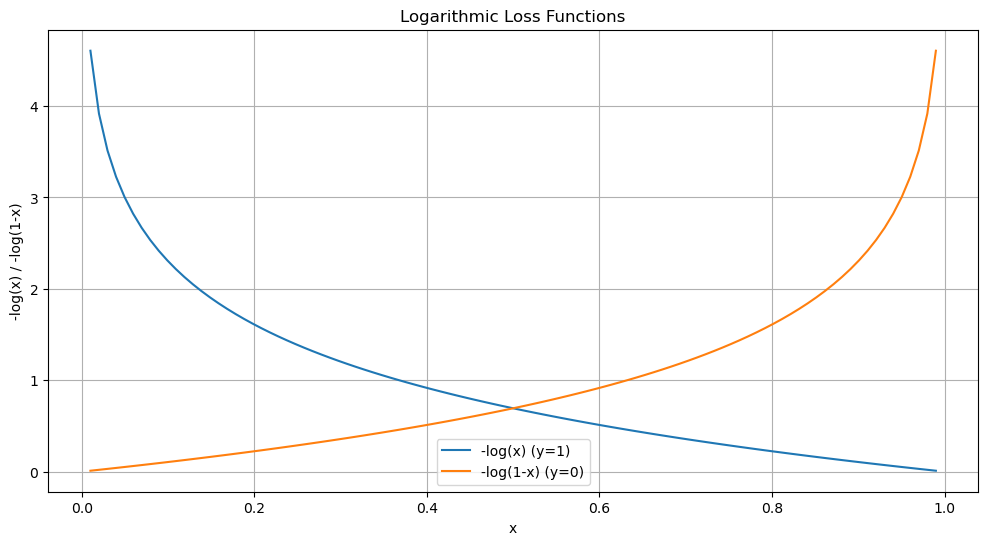

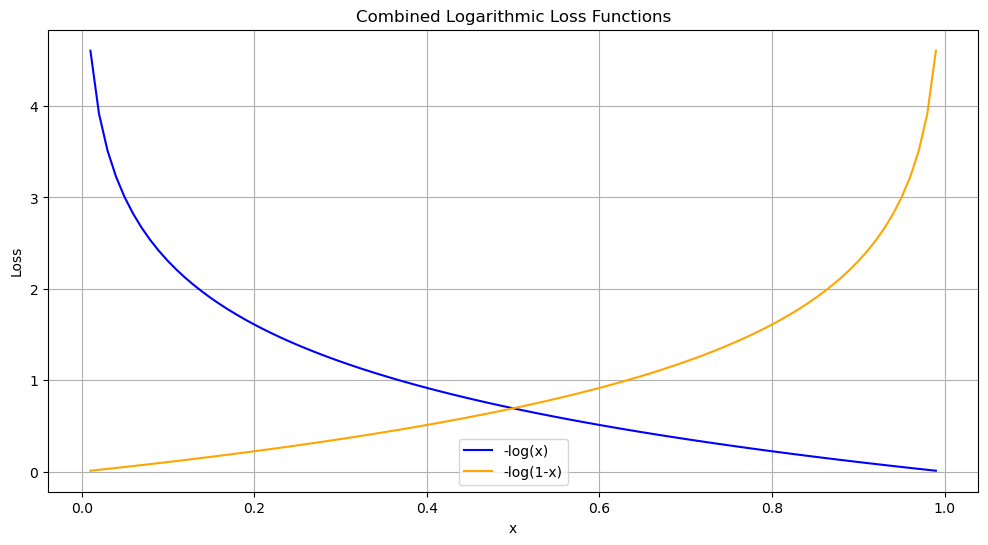

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import log_loss

# Load data
data = {
    'salary': [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2],
    'experience': [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
}
df = pd.DataFrame(data)

# Convert 'experience' into a binary target
df['target'] = (df['experience'] > 3.0).astype(int)

# Define features and target
X = df[['salary']].values
y = df['target'].values

# Define parameters for SGD
epochs = 5
iterations_per_epoch = 60
learning_rate = 0.01

# Initialize SGDClassifier with 'log_loss' loss function
sgd = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, max_iter=1, warm_start=True)
log_losses = []
betas_0 = []
betas_1 = []

for epoch in range(epochs):
    for iteration in range(iterations_per_epoch):
        sgd.fit(X, y)
        log_losses.append(log_loss(y, sgd.predict_proba(X)))
        betas_0.append(sgd.intercept_[0])
        betas_1.append(sgd.coef_[0][0])

# Plot log loss/error versus iteration
plt.figure(figsize=(12, 6))
plt.plot(range(epochs * iterations_per_epoch), log_losses, label='SGD Log Loss/Error')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Iteration (SGD)')
plt.legend()
plt.grid()
plt.show()

# Standard Logistic Regression for comparison
lr = LogisticRegression(max_iter=60)
lr.fit(X, y)

# Get the coefficients and intercepts
coef = lr.coef_[0]
intercept = lr.intercept_[0]
y_pred_prob = lr.predict_proba(X)[:, 1]
log_loss_sklearn = log_loss(y, y_pred_prob)

# Plot beta versus log loss/error
plt.figure(figsize=(12, 6))
plt.plot(range(epochs * iterations_per_epoch), betas_0, label='SGD Beta_0')
plt.plot(range(epochs * iterations_per_epoch), betas_1, label='SGD Beta_1')
plt.axhline(y=intercept, color='r', linestyle='--', label='Sklearn Beta_0')
plt.axhline(y=coef[0], color='g', linestyle='--', label='Sklearn Beta_1')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.title('Beta Values vs Iteration')
plt.legend()
plt.grid()
plt.show()

# Plot -log(x) and -log(1-x) for y=1 and y=0
x = np.linspace(0.01, 0.99, 100)
log_x = -np.log(x)
log_1_x = -np.log(1 - x)

plt.figure(figsize=(12, 6))
plt.plot(x, log_x, label='-log(x) (y=1)')
plt.plot(x, log_1_x, label='-log(1-x) (y=0)')
plt.xlabel('x')
plt.ylabel('-log(x) / -log(1-x)')
plt.title('Logarithmic Loss Functions')
plt.legend()
plt.grid()
plt.show()

# Combined graph of -log(x) and -log(1-x)
plt.figure(figsize=(12, 6))
plt.plot(x, log_x, label='-log(x)', color='blue')
plt.plot(x, log_1_x, label='-log(1-x)', color='orange')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Combined Logarithmic Loss Functions')
plt.legend()
plt.grid()
plt.show()


# Q5

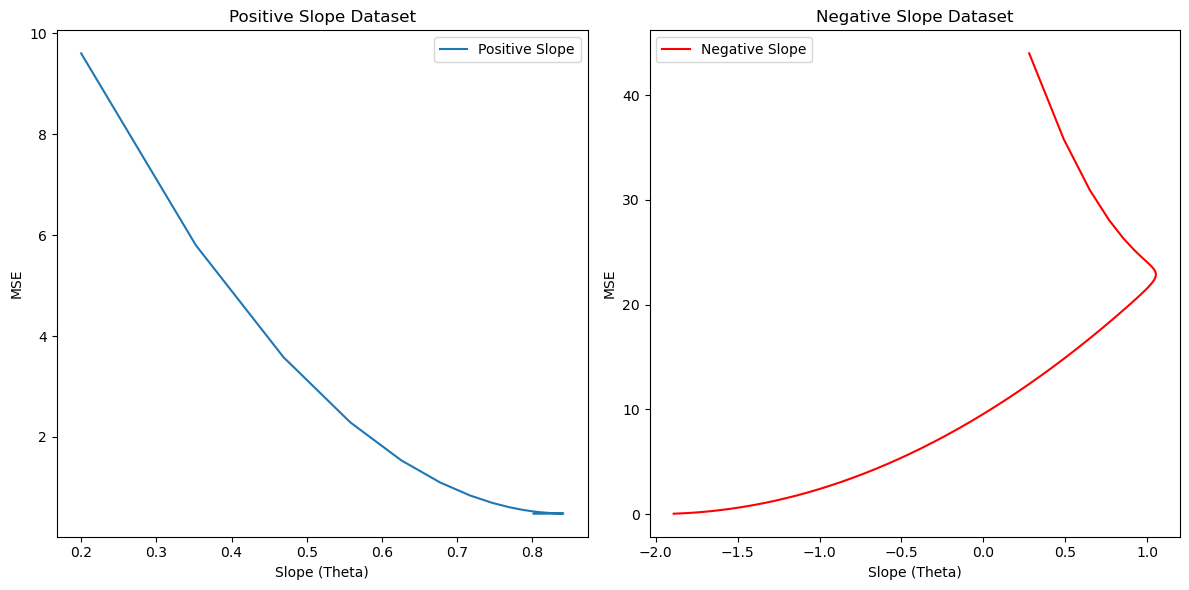

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)  # Number of data points
    theta = 0   # Initial slope
    b = 0       # Initial intercept
    m_values = []  # To store slope values
    mse_values = [] # To store MSE values
    
    for _ in range(iterations):

        predictions = theta * x + b

        errors = predictions - y

        gradient_theta = (2/m) * np.sum(errors * x)
        gradient_b = (2/m) * np.sum(errors)

        theta -= learning_rate * gradient_theta
        b -= learning_rate * gradient_b

        mse = np.mean(errors**2)
        
        m_values.append(theta)
        mse_values.append(mse)
    
    return m_values, mse_values

x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

m_pos, mse_pos = gradient_descent(x_pos, y_pos)
m_neg, mse_neg = gradient_descent(x_neg, y_neg)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(m_pos, mse_pos, label='Positive Slope')
plt.xlabel('Slope (Theta)')
plt.ylabel('MSE')
plt.title('Positive Slope Dataset')
plt.legend()

# Negative Slope
plt.subplot(1, 2, 2)
plt.plot(m_neg, mse_neg, label='Negative Slope', color='red')
plt.xlabel('Slope (Theta)')
plt.ylabel('MSE')
plt.title('Negative Slope Dataset')
plt.legend()

plt.tight_layout()
plt.show()


# A2

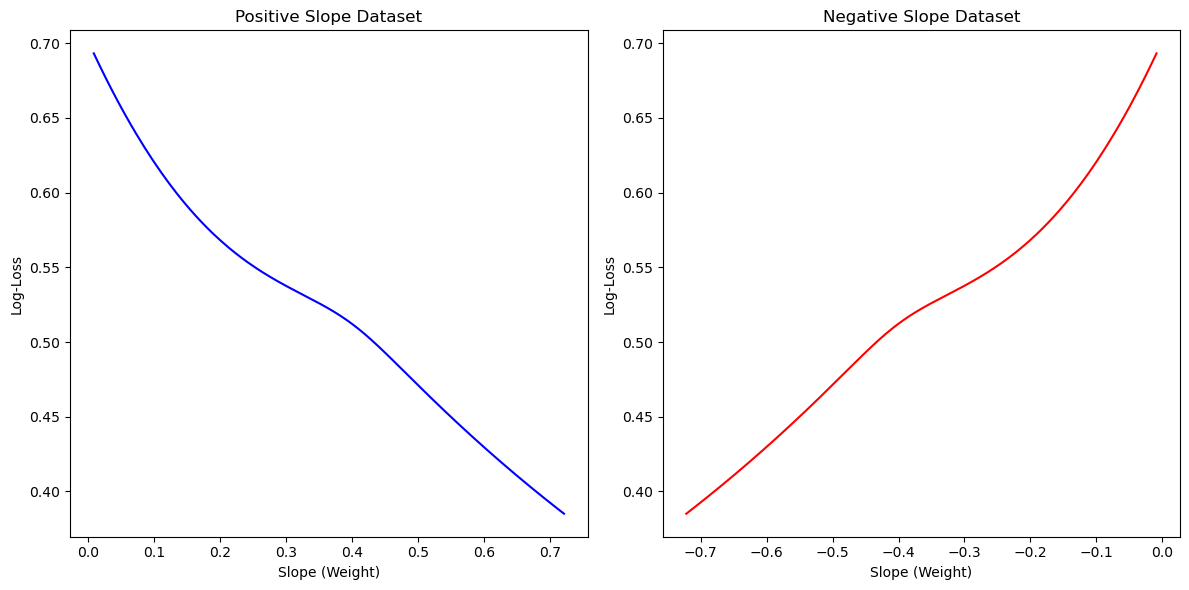

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic regression gradient descent function
def logistic_regression_grad_descent(x, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    w = 0  # Initialize weight
    b = 0  # Initialize bias
    w_values = []  # To store weight values
    loss_values = []  # To store log-loss values
    
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def compute_log_loss(y_pred, y):
        return -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
    
    for _ in range(epochs):
        # Compute predictions
        z = w * x + b
        y_pred = sigmoid(z)
        
        # Compute error
        error = y_pred - y
        
        # Compute gradients
        gradient_w = (1/m) * np.dot(error, x)
        gradient_b = (1/m) * np.sum(error)
        
        # Update weights and bias
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        
        # Compute log-loss
        log_loss = compute_log_loss(y_pred, y)
        
        # Store values for plotting
        w_values.append(w)
        loss_values.append(log_loss)
    
    return w_values, loss_values

# Positive slope dataset
x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])

# Negative slope dataset
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])

# Apply gradient descent
w_pos, loss_pos = logistic_regression_grad_descent(x_pos, y_pos)
w_neg, loss_neg = logistic_regression_grad_descent(x_neg, y_neg)

# Plot Slope vs. Log-Loss for Positive Slope Dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_pos, loss_pos, color='blue')
plt.xlabel('Slope (Weight)')
plt.ylabel('Log-Loss')
plt.title('Positive Slope Dataset')

# Plot Slope vs. Log-Loss for Negative Slope Dataset
plt.subplot(1, 2, 2)
plt.plot(w_neg, loss_neg, color='red')
plt.xlabel('Slope (Weight)')
plt.ylabel('Log-Loss')
plt.title('Negative Slope Dataset')

plt.tight_layout()
plt.show()
